In [102]:
import requests
housing_data = requests.get("https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/regression/housing_scale")

In [103]:
housing_data

<Response [200]>

In [104]:
from sklearn.datasets import load_svmlight_file
from io import BytesIO
x,y = load_svmlight_file(f=BytesIO(housing_data.content),n_features=13)
x = x.data.reshape(x.shape)

In [105]:
from sklearn.model_selection import train_test_split
x_train, x_loss, y_train, y_loss = train_test_split(x, y, test_size=0.5)

In [106]:
print(x_train.shape,type(x_train))

(253, 13) <class 'numpy.ndarray'>


In [107]:
import numpy as np
m, n = x_train.shape # m = training sample, n = total no of feature
x_train = np.concatenate((x_train,np.ones((m,1))),axis=1)
y_train = np.reshape(y_train,(m,1))

In [108]:
m, n = x_loss.shape
x_loss = np.concatenate((x_loss,np.ones((m,1))),axis=1)
y_loss = np.reshape(y_loss,(m,1))


In [109]:
f = 0.8 #factor initialization
lr = 0.0008 # lr = learning rate initialization
W = np.zeros((n + 1,1))
train_loss = [] #train loss array initialization
test_loss = [] #validation loss array initialization
total_iteration = 200 #total no of iteration
for i in range(total_iteration):
    diff = np.dot(x_train,W) - y_train 
    g = f * W + np.dot(x_train.transpose(),diff) # g = gradient , fa = factor 
    g = -g 
    W = W + lr * g # update the parameters
    
    predict = np.dot(x_train,W) # predict under the train set
    loss_train = np.average(np.abs(predict-y_train)) #calculate the absolute differences
    train_loss.append(loss_train)
    
    predict = np.dot(x_loss,W) #predict under the validation set
    loss_test = np.average(np.abs(predict-y_loss)) #calculate the absolute differences
    test_loss.append(loss_test)

Text(0.5,1,'Linear Regression and Gradient Descent')

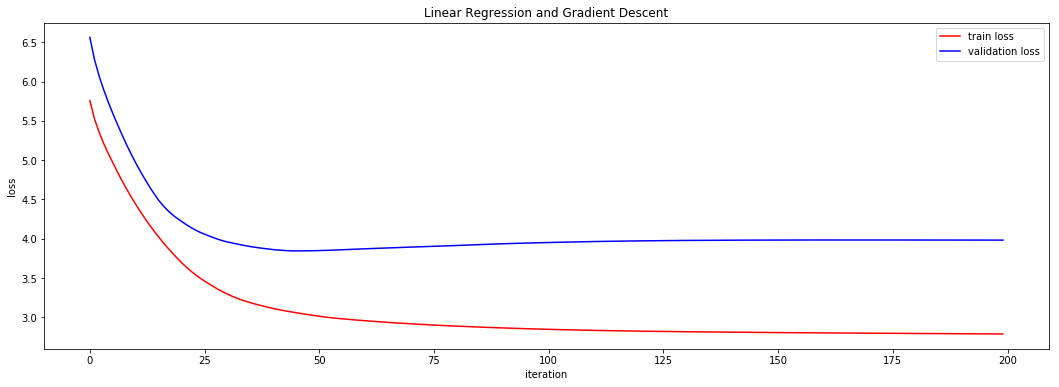

In [110]:
%matplotlib inline
import matplotlib.pyplot as plt 

epoches = range(len(train_loss))
plt.figure(figsize=(18,6))
plt.plot(epoches,train_loss,"-",color="r",label="train loss") 
plt.plot(epoches,test_loss,"-",color="b",label="validation loss") 
plt.xlabel("iteration")
plt.ylabel("loss")
plt.legend()
plt.title("Linear Regression and Gradient Descent")